<a href="https://colab.research.google.com/github/johanjun/dacon_growthperiod/blob/main/Data_load.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
!nvidia-smi

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mon Dec 13 04:42:58 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0    23W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+------

In [2]:
## library import
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import re
from PIL import Image
import shutil
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
from glob import glob
import pandas as pd
from tqdm import tqdm

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

In [3]:
root_dir = '/content/drive/MyDrive/growth/open/'
train_data_dir = os.path.join(root_dir, 'train_dataset')
test_data_dir = os.path.join(root_dir, 'test_dataset')

In [4]:
bt_train = glob(train_data_dir + '/BC/*')
bt_train_name = [x[-5:] for x in bt_train]

lt_train = glob(train_data_dir + '/LT/*')
lt_train_name = [x[-5:] for x in lt_train]

In [5]:
bt_images = {key: glob(name + '/*.png') for key, name in zip(bt_train_name, bt_train)}
lt_images = {key: glob(name + '/*.png') for key, name in zip(lt_train_name, lt_train)}

In [6]:
def extract_day(images):
    day = int(images.split('.')[-2][-2:])
    return day

def make_day_array(images):
    day_array = np.array([extract_day(x) for x in images])
    return day_array

In [7]:
bt_dayes = {key: make_day_array(bt_images[key]) for key in bt_train_name}
lt_dayes = {key: make_day_array(lt_images[key]) for key in lt_train_name}

In [8]:
bt_dfs = []

for i in bt_train_name:
    bt_df = pd.DataFrame({
        'file_name': bt_images[i],
        'day': bt_dayes[i],
        'species': 'bc',
        'version': i
    })
    bt_dfs.append(bt_df)
    
lt_dfs = []

for i in lt_train_name:
    lt_df = pd.DataFrame({
        'file_name': lt_images[i],
        'day': lt_dayes[i],
        'species': 'lt',
        'version': i
    })
    lt_dfs.append(lt_df)

bf_dataframe = pd.concat(bt_dfs).reset_index(drop=True)
lt_dataframe = pd.concat(lt_dfs).reset_index(drop=True)

total_dataframe = pd.concat([bf_dataframe, lt_dataframe]).reset_index(drop=True)
total_dataframe

,file_name,day,species,version
0,/content/drive/MyDrive/growth/open/train_datas...,1.0,bc,BC_01
1,/content/drive/MyDrive/growth/open/train_datas...,2.0,bc,BC_01
2,/content/drive/MyDrive/growth/open/train_datas...,3.0,bc,BC_01
3,/content/drive/MyDrive/growth/open/train_datas...,4.0,bc,BC_01
4,/content/drive/MyDrive/growth/open/train_datas...,5.0,bc,BC_01
5,/content/drive/MyDrive/growth/open/train_datas...,6.0,bc,BC_01
6,/content/drive/MyDrive/growth/open/train_datas...,8.0,bc,BC_01
7,/content/drive/MyDrive/growth/open/train_datas...,9.0,bc,BC_01
8,/content/drive/MyDrive/growth/open/train_datas...,10.0,bc,BC_01
9,/content/drive/MyDrive/growth/open/train_datas...,11.0,bc,BC_01


In [9]:
def make_combination(species, data_frame):
    before_file_path = []
    after_file_path = []
    time_delta = []

    for version in data_frame[data_frame['species'] == species]['version'].unique():
        for i in range(0, len(data_frame[data_frame['version'] == version]) - 1):
            for j in range(i + 1, len(data_frame[data_frame['version'] == version])):
                after = data_frame[data_frame['version'] == version].iloc[j].reset_index(drop=True)
                before = data_frame[data_frame['version'] == version].iloc[i].reset_index(drop=True)

                before_file_path.append(before[0])
                after_file_path.append(after[0])

                delta = int(after[1] - before[1])
                time_delta.append(delta)


    combination_df = pd.DataFrame({
        'before_file_path': before_file_path,
        'after_file_path': after_file_path,
        'time_delta': time_delta,
    })

    combination_df['species'] = species

    return combination_df

bt_combination = make_combination('bc', total_dataframe)
lt_combination = make_combination('lt', total_dataframe)

bt_train = bt_combination
lt_train = lt_combination

train_set = pd.concat([bt_train, lt_train])
train_set

,before_file_path,after_file_path,time_delta,species
0,/content/drive/MyDrive/growth/open/train_datas...,/content/drive/MyDrive/growth/open/train_datas...,1,bc
1,/content/drive/MyDrive/growth/open/train_datas...,/content/drive/MyDrive/growth/open/train_datas...,2,bc
2,/content/drive/MyDrive/growth/open/train_datas...,/content/drive/MyDrive/growth/open/train_datas...,3,bc
3,/content/drive/MyDrive/growth/open/train_datas...,/content/drive/MyDrive/growth/open/train_datas...,4,bc
4,/content/drive/MyDrive/growth/open/train_datas...,/content/drive/MyDrive/growth/open/train_datas...,5,bc
...,...,...,...,...
7796,/content/drive/MyDrive/growth/open/train_datas...,/content/drive/MyDrive/growth/open/train_datas...,2,lt
7797,/content/drive/MyDrive/growth/open/train_datas...,/content/drive/MyDrive/growth/open/train_datas...,3,lt
7798,/content/drive/MyDrive/growth/open/train_datas...,/content/drive/MyDrive/growth/open/train_datas...,1,lt
7799,/content/drive/MyDrive/growth/open/train_datas...,/content/drive/MyDrive/growth/open/train_datas...,2,lt


In [10]:
cd /content/drive/MyDrive/dacon_growthperiod/open/train_dataset

[Errno 2] No such file or directory: '/content/drive/MyDrive/dacon_growthperiod/open/train_dataset'
/content


In [11]:
train_set.to_csv('train_set.csv')

In [12]:
train_set.reset_index(inplace=True, drop=True)

In [13]:
train_set.tail()

,before_file_path,after_file_path,time_delta,species
14608,/content/drive/MyDrive/growth/open/train_datas...,/content/drive/MyDrive/growth/open/train_datas...,2,lt
14609,/content/drive/MyDrive/growth/open/train_datas...,/content/drive/MyDrive/growth/open/train_datas...,3,lt
14610,/content/drive/MyDrive/growth/open/train_datas...,/content/drive/MyDrive/growth/open/train_datas...,1,lt
14611,/content/drive/MyDrive/growth/open/train_datas...,/content/drive/MyDrive/growth/open/train_datas...,2,lt
14612,/content/drive/MyDrive/growth/open/train_datas...,/content/drive/MyDrive/growth/open/train_datas...,1,lt


In [14]:
## train, validation directory 생성
train_dir = os.path.join(train_data_dir, 'train')
val_dir = os.path.join(train_data_dir, 'validation')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

In [15]:
train_set.species.value_counts()

lt    7801
bc    6812
Name: species, dtype: int64

In [16]:
train_set[6806:6815]

,before_file_path,after_file_path,time_delta,species
6806,/content/drive/MyDrive/growth/open/train_datas...,/content/drive/MyDrive/growth/open/train_datas...,1,bc
6807,/content/drive/MyDrive/growth/open/train_datas...,/content/drive/MyDrive/growth/open/train_datas...,2,bc
6808,/content/drive/MyDrive/growth/open/train_datas...,/content/drive/MyDrive/growth/open/train_datas...,3,bc
6809,/content/drive/MyDrive/growth/open/train_datas...,/content/drive/MyDrive/growth/open/train_datas...,1,bc
6810,/content/drive/MyDrive/growth/open/train_datas...,/content/drive/MyDrive/growth/open/train_datas...,2,bc
6811,/content/drive/MyDrive/growth/open/train_datas...,/content/drive/MyDrive/growth/open/train_datas...,1,bc
6812,/content/drive/MyDrive/growth/open/train_datas...,/content/drive/MyDrive/growth/open/train_datas...,1,lt
6813,/content/drive/MyDrive/growth/open/train_datas...,/content/drive/MyDrive/growth/open/train_datas...,2,lt
6814,/content/drive/MyDrive/growth/open/train_datas...,/content/drive/MyDrive/growth/open/train_datas...,3,lt


In [17]:
train_set.species.replace('bc', 0, inplace=True)
train_set.species.replace('lt', 1, inplace=True)

In [18]:
train_set_shuffled = train_set.sample(frac=1).reset_index(drop=True)

In [19]:
df_train = train_set_shuffled[:int(14613*0.8)]

In [20]:
df_val = train_set_shuffled[int(14613*0.8):]

# to-tfrecord

In [21]:
# The following functions can be used to convert a value to a type compatible
# with tf.Example.

def _bytes_feature(value):
  """Returns a bytes_list from a string / byte."""
  if isinstance(value, type(tf.constant(0))):
    value = value.numpy() # BytesList won't unpack a string from an EagerTensor.
  return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
  """Returns a float_list from a float / double."""
  return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _int64_feature(value):
  """Returns an int64_list from a bool / enum / int / uint."""
  return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

In [22]:
## TFRecord 저장할 directory와 file 경로 설정
tfr_dir = os.path.join(train_data_dir, 'tfrecord')
os.makedirs(tfr_dir, exist_ok=True)
tfr_train_dir = os.path.join(tfr_dir, 'cls_train.tfr')
## TFRecord writer 생성
writer_train = tf.io.TFRecordWriter(tfr_train_dir)
df_train.species.value_counts()

1    6278
0    5412
Name: species, dtype: int64

In [23]:
df_train.tail()

,before_file_path,after_file_path,time_delta,species
11685,/content/drive/MyDrive/growth/open/train_datas...,/content/drive/MyDrive/growth/open/train_datas...,2,1
11686,/content/drive/MyDrive/growth/open/train_datas...,/content/drive/MyDrive/growth/open/train_datas...,30,1
11687,/content/drive/MyDrive/growth/open/train_datas...,/content/drive/MyDrive/growth/open/train_datas...,13,0
11688,/content/drive/MyDrive/growth/open/train_datas...,/content/drive/MyDrive/growth/open/train_datas...,30,1
11689,/content/drive/MyDrive/growth/open/train_datas...,/content/drive/MyDrive/growth/open/train_datas...,5,1


In [24]:
  before_image = Image.open(df_train.iloc[0].before_file_path)
  before_image = before_image.resize((224, 224))
  before_bimage = before_image.tobytes()

  after_image = Image.open(df_train.iloc[0].after_file_path)
  after_image = after_image.resize((224, 224))
  after_bimage = after_image.tobytes()

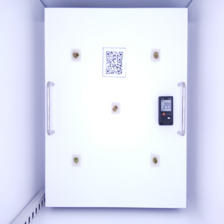

In [25]:
before_image

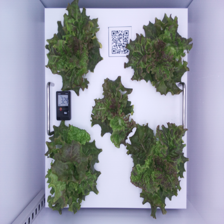

In [26]:
after_image

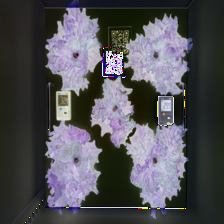

In [27]:
pil_image = Image.fromarray(np.array(before_image) - np.array(after_image))
pil_image

In [28]:
n_train = 0

for i, v in tqdm(df_train.iterrows()):
  before_image = Image.open(v.before_file_path)
  before_image = before_image.resize((224, 224))

  after_image = Image.open(v.after_file_path)
  after_image = after_image.resize((224, 224))

  delta = Image.fromarray(np.array(before_image) - np.array(after_image))
  bdelta = delta.tobytes()

  td = v.time_delta

  example = tf.train.Example(features=tf.train.Features(feature={
      'delta': _bytes_feature(bdelta),
      'time_delta': _int64_feature(td)
  }))

  writer_train.write(example.SerializeToString())
  n_train += 1

writer_train.close()
print(n_train)

11690it [2:25:58,  1.33it/s]

11690


In [29]:
tfr_val_dir = os.path.join(tfr_dir, 'cls_val.tfr')
writer_val = tf.io.TFRecordWriter(tfr_val_dir)

In [30]:
n_val = 0

for i, v in df_val.iterrows():
  before_image = Image.open(v.before_file_path)
  before_image = before_image.resize((224, 224))

  after_image = Image.open(v.after_file_path)
  after_image = after_image.resize((224, 224))

  delta = Image.fromarray(np.array(before_image) - np.array(after_image))
  bdelta = delta.tobytes()

  td = v.time_delta

  example = tf.train.Example(features=tf.train.Features(feature={
      'delta': _bytes_feature(bdelta),
      'time_delta': _int64_feature(td)
  }))

  writer_val.write(example.SerializeToString())
  n_val += 1

writer_val.close()
print(n_val)

2923
